1. **Imports**
2. **Load data**
3. **Data in a glance**
4. **Data investigation**
5. **Missing values**
6. **Simple data visualization**
7. **Date related features**
8. **Relation between Start_time, End_time vs Length**
9. **Filling NaN values in temperature column**
10. **Repeat the preprocessing step for test dataframe**
11. **Ready for model fitting**
12. **Prediction on test dataset**

## IMPORTS

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import pickle

## LOAD DATA

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
train_df.drop("Unnamed: 0",inplace=True,axis=1)
test_df.drop("Unnamed: 0",inplace=True,axis=1)

## DATA IN A GLANCE

In [3]:
train_df.columns

Index(['Episode', 'Station', 'Channel Type', 'Season', 'Year', 'Date',
       'Day of week', 'Start_time', 'End_time', 'Length', 'Name of show',
       'Name of episode', 'Genre', 'First time or rerun',
       '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?', 'Market Share_total',
       'Temperature in Montreal during episode'],
      dtype='object')

In [4]:
train_df.sample(2)

Episode    Station       Channel Type  Season  Year  \
246728    REFUGE ANIMAL  TVA Total    General Channel  Summer  2017   
232321  Journal Afrique       TV5+  Specialty Channel  Summer  2017   

              Date Day of week           Start_time             End_time  \
246728  2017-08-21      Monday  2017-08-21 19:00:00  2017-08-21 19:30:00   
232321  2017-07-31      Monday  2017-07-31 23:19:00  2017-07-31 23:39:00   

        Length     Name of show Name of episode             Genre  \
246728       2    REFUGE ANIMAL             NaN  Reality Programs   
232321       1  Journal Afrique      31/07/2017              News   

       First time or rerun # of episode in the season Movie?  \
246728                  No                        Yes     No   
232321                  No                        Yes     No   

       Game of the Canadiens during episode?  Market Share_total  \
246728                                    No                29.6   
232321                                    No                 1.1   

        Temperature in Montreal during episode  
246728                                   27.55  
232321                                   24.05

In [5]:
test_df.sample(2)

Episode        Station       Channel Type  Season  Year  \
13015         Ben 10  Teletoon Fr.+  Specialty Channel  Winter  2019   
78421  Robot Chicken  Teletoon Fr.+  Specialty Channel  Spring  2019   

             Date Day of week           Start_time             End_time  \
13015  2019-02-09    Saturday  2019-02-09 11:45:00  2019-02-09 12:00:00   
78421  2019-05-11    Saturday  2019-05-11 22:15:00  2019-05-11 22:30:00   

       Length   Name of show Name of episode  \
13015       1         Ben 10  Chat-chien-pin   
78421       1  Robot Chicken  Croûte en pâté   

                                      Genre First time or rerun  \
13015  Animated Television Programs & Films                  No   
78421  Animated Television Programs & Films                  No   

      # of episode in the season Movie? Game of the Canadiens during episode?  \
13015                        Yes     No                                    No   
78421                        Yes     No                                    No   

       Temperature in Montreal during episode  
13015                                     NaN  
78421                                  12.025

In [6]:
# whats is target column ?!
set(train_df.columns)-set(test_df.columns)

{'Market Share_total'}

## DATA INVESTIGATION

In [7]:
# column types
train_df.dtypes

Episode                                    object
Station                                    object
Channel Type                               object
Season                                     object
Year                                        int64
Date                                       object
Day of week                                object
Start_time                                 object
End_time                                   object
Length                                      int64
Name of show                               object
Name of episode                            object
Genre                                      object
First time or rerun                        object
# of episode in the season                 object
Movie?                                     object
Game of the Canadiens during episode?      object
Market Share_total                        float64
Temperature in Montreal during episode    float64
dtype: object

**Year**, **Length**, **Market Share_total** and **Temperature in Montreal during episode** are the features with pre-defined types. The rest of features should be investigated (and converted if needed) 

In [8]:
# describing numerical features
train_df.describe()

Year         Length  Market Share_total  \
count  616656.000000  616656.000000       616656.000000   
mean     2017.381420       3.203963            3.011562   
std         0.751344       5.306656            4.919562   
min      2016.000000       0.000000            0.000000   
25%      2017.000000       2.000000            0.400000   
50%      2017.000000       2.000000            1.400000   
75%      2018.000000       4.000000            3.400000   
max      2019.000000      92.000000           89.500000   

       Temperature in Montreal during episode  
count                           533312.000000  
mean                                 6.707428  
std                                 12.178492  
min                                -27.425000  
25%                                 -1.562500  
50%                                  6.450000  
75%                                 17.050000  
max                                 34.950000

In [9]:
# how about nulls and missing values ?!
# how about unique values ?!
print ("Rows     : " ,train_df.shape[0])
print ("Columns  : " ,train_df.shape[1])
print ("\nFeatures : \n" ,train_df.columns.tolist())
print ("\nMissing values :  ", train_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",train_df.nunique())

Rows     :  616656
Columns  :  19

Features : 
 ['Episode', 'Station', 'Channel Type', 'Season', 'Year', 'Date', 'Day of week', 'Start_time', 'End_time', 'Length', 'Name of show', 'Name of episode', 'Genre', 'First time or rerun', '# of episode in the season', 'Movie?', 'Game of the Canadiens during episode?', 'Market Share_total', 'Temperature in Montreal during episode']

Missing values :   306009

Unique values :  
 Episode                                     6687
Station                                       24
Channel Type                                   2
Season                                         4
Year                                           4
Date                                         877
Day of week                                    7
Start_time                                138321
End_time                                  138333
Length                                        39
Name of show                                6687
Name of episode                       

There are **306009** Missing values. 

Although it is of course reasonable that numerical features have lots of unique values, feautures like **Channel Type**, **First time or rerun** **#number of episode in the season**, **Movie?!** and **Game of the Canadiens during episode?** have only two unique values.
Features such as **Name of episode** have huge number of unique values.



## MISSING VALUES

In [10]:
train_df.isna().sum()

Episode                                        0
Station                                        0
Channel Type                                   0
Season                                         0
Year                                           0
Date                                           0
Day of week                                    0
Start_time                                    43
End_time                                      43
Length                                         0
Name of show                                   0
Name of episode                           222579
Genre                                          0
First time or rerun                            0
# of episode in the season                     0
Movie?                                         0
Game of the Canadiens during episode?          0
Market Share_total                             0
Temperature in Montreal during episode     83344
dtype: int64

We can reduce number of missing values for the **Temperature in Montreal during episode**. 

We should also take some guesses for **Name of episode**, but we can do nothing for filling **Start_time** and **End_time** 

## SIMPLE DATA VISUALIZATION

In [11]:
# Binary Features
binary_features = ["Channel Type","First time or rerun","# of episode in the season",
                   "Movie?","Game of the Canadiens during episode?"
                  ]
train_df[binary_features].sample(3)

Channel Type First time or rerun # of episode in the season  \
21951   Specialty Channel                  No                        Yes   
480649    General Channel                  No                        Yes   
542126  Specialty Channel                  No                        Yes   

       Movie? Game of the Canadiens during episode?  
21951      No                                    No  
480649     No                                    No  
542126     No                                    No

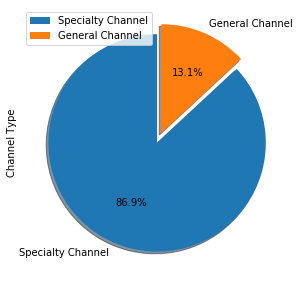

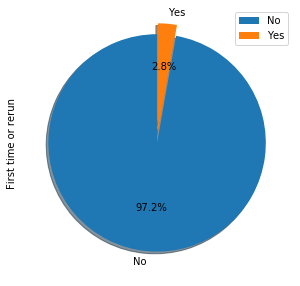

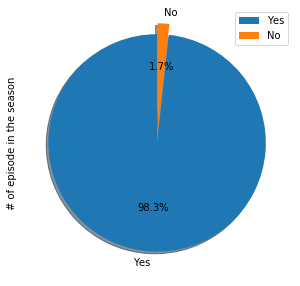

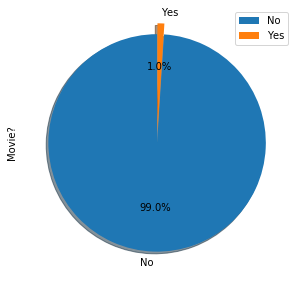

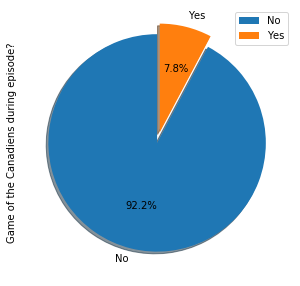

In [12]:
for i in range(len(binary_features)):
    pd.DataFrame(train_df[binary_features[i]].value_counts()).plot(kind="pie",subplots=True,explode=(0,0.1),autopct='%1.1f%%',shadow=True, startangle=90,figsize=(5,5))

we deal with **imbalanced** dataset !

In [13]:
categorical_features_1 = ["Station","Season","Genre"]
categorical_features_2 = ["Episode","Name of show","Name of episode",]

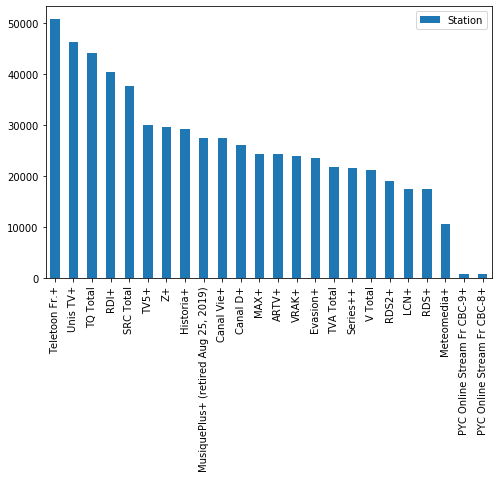

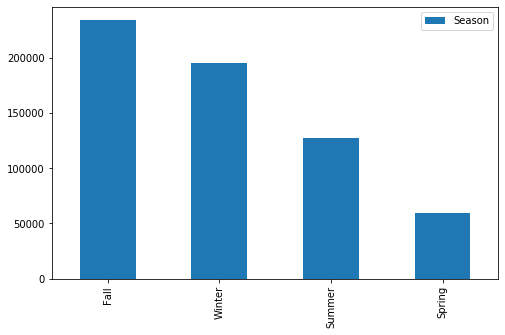

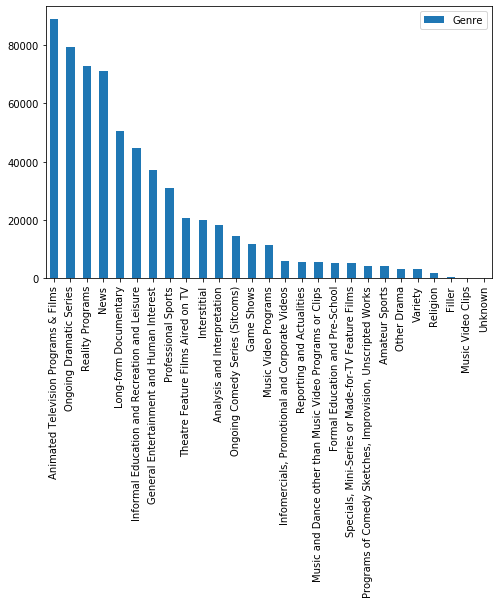

In [14]:
for i in range(len(categorical_features_1)):
    pd.DataFrame(train_df[categorical_features_1[i]].value_counts()).plot(kind="bar",figsize=(8,5))

## DATE RELATED FEATURES

In [15]:
#"Date","Day of week","Start_time","End_time"
train_df["Date"] = pd.to_datetime(train_df["Date"])
train_df["Day of week"] = train_df["Date"].dt.dayofweek
train_df["month"] = train_df["Date"].dt.month
train_df["year"] = train_df["Date"].dt.year
train_df["hour"] = pd.to_datetime(train_df["Start_time"]).dt.hour

In [16]:
train_df.sample(1)

Episode                              Station       Channel Type  \
116524  MP MIX  MusiquePlus+ (retired Aug 25, 2019)  Specialty Channel   

        Season  Year       Date  Day of week           Start_time  \
116524  Winter  2017 2017-02-14            1  2017-02-14 04:00:00   

                   End_time  Length  ...  \
116524  2017-02-14 05:00:00       4  ...   

                                                    Genre First time or rerun  \
116524  Music and Dance other than Music Video Program...                  No   

       # of episode in the season Movie?  \
116524                        Yes     No   

       Game of the Canadiens during episode? Market Share_total  \
116524                                    No                0.0   

       Temperature in Montreal during episode  month  year  hour  
116524                                  -5.65      2  2017   4.0  

[1 rows x 22 columns]

## RELATION BETWEEN START_TIME, END_TIME VS LENGTH

In [17]:
train_df["diff"] = (pd.to_datetime(train_df["End_time"]) - pd.to_datetime(train_df["Start_time"])).dt.total_seconds() / 60 / 15
train_df.head(1)

Episode  Station     Channel Type Season  Year       Date  \
0  Vidéoclips V  V Total  General Channel   Fall  2016 2016-08-29   

   Day of week           Start_time             End_time  Length  ...  \
0            0  2016-08-29 06:00:00  2016-08-29 08:00:00       8  ...   

  First time or rerun # of episode in the season Movie?  \
0                  No                        Yes     No   

  Game of the Canadiens during episode? Market Share_total  \
0                                    No                0.9   

  Temperature in Montreal during episode month  year  hour  diff  
0                                   20.4     8  2016   6.0   8.0  

[1 rows x 23 columns]

In [18]:
train_df[train_df["diff"] != train_df ["Length"]].loc[:,["Length","diff"]].sample(5)

Length      diff
333889       4  4.133333
86497        0  0.666667
29461        4  4.200000
5851         3  3.533333
508913       2  2.400000

So, if we take a **int** from diff, we have the same velue as we have in *length*. **We can drop them.** Lets drop NaN values and then do comparison again.

In [19]:
train_df.dropna(subset=['Start_time', 'End_time'],inplace=True)
train_df["diff"] = list(map(int,train_df["diff"]))

In [20]:
train_df[train_df["Length"] != train_df["diff"]].shape

(115, 23)

**We could confirm our hypothesis!**

There are only 115/616613 records which does not satisfy our hypothesis. 

In [21]:
index_ids_to_drop = train_df[train_df["Length"] != train_df["diff"]].index.to_list()
train_df.drop(index=index_ids_to_drop,axis=0,inplace=True)

In [22]:
train_df.drop(["diff"],axis=1,inplace=True)

## FILLING NaN VALUES IN TEMPERATURE COLUMN

In [23]:
# how many null values do we have in temperature column?!
train_df.loc[np.isnan(train_df["Temperature in Montreal during episode"])].shape[0]

83299

In [24]:
# lets fill null values with avg(temperature) in each season.
# what are the avg values for temperature (in each season)

mean_temps = train_df.groupby("Season")["Temperature in Montreal during episode"].mean()
mean_temps

Season
Fall       7.760283
Spring    11.613818
Summer    20.452629
Winter    -4.878386
Name: Temperature in Montreal during episode, dtype: float64

In [25]:
# so, lets fill missing values with correspondence values
def fill_nan_temperature(season,value,df):
    df.loc[(df["Season"] == season) & (df["Temperature in Montreal during episode"].isna()),
            "Temperature in Montreal during episode"
            ] = value
    return df

In [26]:
train_df = fill_nan_temperature(season="Spring",value=mean_temps["Spring"], df = train_df)
train_df = fill_nan_temperature(season="Summer",value=mean_temps["Summer"], df=train_df)
train_df = fill_nan_temperature(season="Fall",value=mean_temps["Fall"], df=train_df)
train_df = fill_nan_temperature(season="Winter",value=mean_temps["Winter"], df = train_df)

In [27]:
# what else nan values are remaining ?!
train_df.isna().sum()

Episode                                        0
Station                                        0
Channel Type                                   0
Season                                         0
Year                                           0
Date                                           0
Day of week                                    0
Start_time                                     0
End_time                                       0
Length                                         0
Name of show                                   0
Name of episode                           222509
Genre                                          0
First time or rerun                            0
# of episode in the season                     0
Movie?                                         0
Game of the Canadiens during episode?          0
Market Share_total                             0
Temperature in Montreal during episode         0
month                                          0
year                

## REPEAT THE PREPROCESSING STEP (EXACTLY) FOR TEST SET

In [28]:
#"Date","Day of week","Start_time","End_time"
test_df["Date"] = pd.to_datetime(test_df["Date"])
test_df["Day of week"] = test_df["Date"].dt.dayofweek
test_df["month"] = test_df["Date"].dt.month
test_df["year"] = test_df["Date"].dt.year
test_df["hour"] = pd.to_datetime(test_df["Start_time"]).dt.hour

In [29]:
test_df.head(1)

Episode Station       Channel Type  Season  Year       Date  \
0  Mom V.F. (M)   VRAK+  Specialty Channel  Winter  2019 2019-01-22   

   Day of week           Start_time             End_time  Length  ...  \
0            1  2019-01-22 11:30:00  2019-01-22 12:00:00       2  ...   

  Name of episode                            Genre First time or rerun  \
0      Abstinence  Ongoing Comedy Series (Sitcoms)                  No   

  # of episode in the season Movie? Game of the Canadiens during episode?  \
0                        Yes     No                                    No   

  Temperature in Montreal during episode  month  year  hour  
0                                -22.525      1  2019  11.0  

[1 rows x 21 columns]

In [30]:
test_df = fill_nan_temperature(season="Spring",value=mean_temps["Spring"],df=test_df)
test_df = fill_nan_temperature(season="Summer",value=mean_temps["Summer"],df=test_df)
test_df = fill_nan_temperature(season="Fall",value=mean_temps["Fall"],df=test_df)
test_df = fill_nan_temperature(season="Winter",value=mean_temps["Winter"],df=test_df)

## READY FOR MODEL FITTING?!

In [31]:
train_df.drop(["Name of episode"],axis=1,inplace=True)
test_df.drop(["Name of episode"],axis=1,inplace=True)

In [32]:
train_df.dropna(inplace=True)

In [33]:
train_df.isna().sum(), test_df.isna().sum()

(Episode                                   0
 Station                                   0
 Channel Type                              0
 Season                                    0
 Year                                      0
 Date                                      0
 Day of week                               0
 Start_time                                0
 End_time                                  0
 Length                                    0
 Name of show                              0
 Genre                                     0
 First time or rerun                       0
 # of episode in the season                0
 Movie?                                    0
 Game of the Canadiens during episode?     0
 Market Share_total                        0
 Temperature in Montreal during episode    0
 month                                     0
 year                                      0
 hour                                      0
 dtype: int64,
 Episode                                

In [34]:
# prepare for model fitting

In [35]:
to_drop_features = ["Year","Date","Start_time","End_time"]

categorical_features = ['Episode', 'Station', 'Channel Type', 'Season', "Name of show","Genre", \
                       "First time or rerun","# of episode in the season","Movie?",
                        "Game of the Canadiens during episode?" , "year", "Day of week"
                       ]

numerical_features = ["Length","Temperature in Montreal during episode","hour"]

In [36]:
train_df.drop(to_drop_features,axis=1,inplace=True)
test_df.drop(to_drop_features,axis=1,inplace=True)

In [37]:
for column_iter in categorical_features:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[column_iter].values.astype('str')) + list(test_df[column_iter].values.astype('str')))
    train_df[column_iter] = lbl.transform(list(train_df[column_iter].values.astype('str')))
    test_df[column_iter] = lbl.transform(list(test_df[column_iter].values.astype('str')))

for column_iter in numerical_features:
    train_df[column_iter] = train_df[column_iter].astype(np.float)
    test_df[column_iter] = test_df[column_iter].astype(np.float)

In [38]:
_train_df, _eval_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [39]:
_train_df.head(1)

Episode  Station  Channel Type  Season  Day of week  Length  \
377668     1398       17             1       3            1     2.0   

        Name of show  Genre  First time or rerun  # of episode in the season  \
377668          1398     10                    0                           1   

        Movie?  Game of the Canadiens during episode?  Market Share_total  \
377668       0                                      0                 1.5   

        Temperature in Montreal during episode  month  year  hour  
377668                                   1.875      2     2   1.0

In [40]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 30,
    "min_child_samples": 100,
    "learning_rate": 0.1,
    "bagging_fraction": 0.7,
    "feature_fraction": 0.5,
    "bagging_frequency": 5,
    "bagging_seed": 2018,
    "verbosity": -1
}
lgb_train = lgb.Dataset(_train_df.loc[:,_train_df.columns != "Market Share_total"], _train_df.loc[:,"Market Share_total"])
lgb_eval = lgb.Dataset(_eval_df.loc[:,_eval_df.columns != "Market Share_total"], _eval_df.loc[:,"Market Share_total"], reference=lgb_train)
gbm = lgb.train(params, lgb_train, num_boost_round=5000, valid_sets=[lgb_eval], early_stopping_rounds=100,verbose_eval=500)

Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 1.79173
[1000]	valid_0's rmse: 1.72067
[1500]	valid_0's rmse: 1.69508
[2000]	valid_0's rmse: 1.67501
[2500]	valid_0's rmse: 1.66251
[3000]	valid_0's rmse: 1.65274
[3500]	valid_0's rmse: 1.64619
[4000]	valid_0's rmse: 1.63939
[4500]	valid_0's rmse: 1.63477
[5000]	valid_0's rmse: 1.63104
Did not meet early stopping. Best iteration is:
[4996]	valid_0's rmse: 1.63101


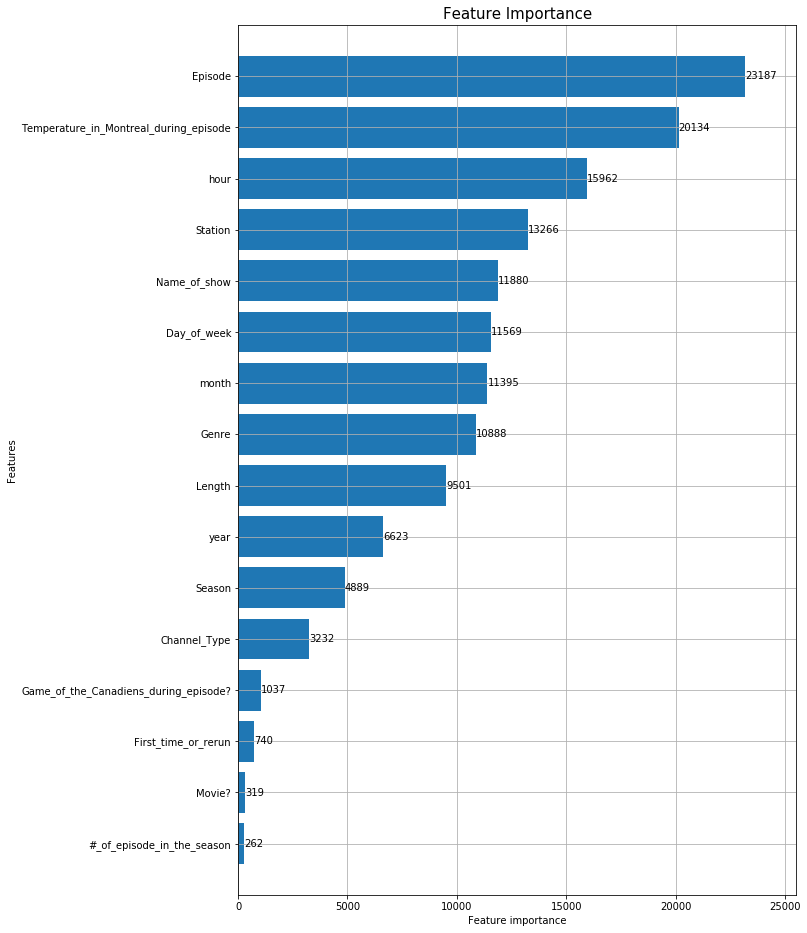

In [41]:
fig, ax = plt.subplots(figsize=(10,16))
lgb.plot_importance(gbm, max_num_features=30, height=0.8, ax=ax)
plt.title("Feature Importance", fontsize=15)
plt.show()

In [42]:
eval_predicted_marketshare = gbm.predict(_eval_df.loc[:,_eval_df.columns != "Market Share_total"], num_iteration=gbm.best_iteration)
_eval_df["predicted"] = eval_predicted_marketshare

In [43]:
_eval_df[["Market Share_total","predicted"]].sample(5)

Market Share_total  predicted
222858                 0.0   0.005530
355027                 0.2   0.445853
270404                 1.8   1.580184
410483                 0.3   1.923221
565336                 2.8   4.443977

## PREDICTION ON TEST DATASET

In [44]:
estimated_lables = gbm.predict(test_df)

In [45]:
test_df = pd.read_csv("../data/test.csv")
test_df.drop("Unnamed: 0",inplace=True,axis=1)
test_df["est_market_share"] = estimated_lables

In [46]:
test_df.loc[test_df["est_market_share"] < 0, "est_market_share"] = 0

In [47]:
test_df.to_csv("../output/final_score.csv")

In [48]:
test_df.head(3)

Episode Station       Channel Type  Season  Year        Date  \
0         Mom V.F. (M)   VRAK+  Specialty Channel  Winter  2019  2019-01-22   
1    2 filles fauchées   VRAK+  Specialty Channel  Winter  2019  2019-01-22   
2  The Big Bang Theory   VRAK+  Specialty Channel  Winter  2019  2019-01-22   

  Day of week           Start_time             End_time  Length  \
0     Tuesday  2019-01-22 11:30:00  2019-01-22 12:00:00       2   
1     Tuesday  2019-01-22 12:00:00  2019-01-22 12:30:00       2   
2     Tuesday  2019-01-22 12:30:00  2019-01-22 13:00:00       2   

          Name of show                         Name of episode  \
0         Mom V.F. (M)                              Abstinence   
1    2 filles fauchées                           Et la rupture   
2  The Big Bang Theory  La désintégration de la sonde spatiale   

                             Genre First time or rerun  \
0  Ongoing Comedy Series (Sitcoms)                  No   
1  Ongoing Comedy Series (Sitcoms)                  No   
2  Ongoing Comedy Series (Sitcoms)                  No   

  # of episode in the season Movie? Game of the Canadiens during episode?  \
0                        Yes     No                                    No   
1                        Yes     No                                    No   
2                        Yes     No                                    No   

   Temperature in Montreal during episode  est_market_share  
0                                 -22.525          0.207217  
1                                 -21.625          0.902204  
2                                 -21.625          0.329549

In [49]:
filename = '../output/gbm.pkl'
pickle.dump(gbm, open(filename, 'wb'))